## Time series

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

In [7]:
y = load_airline()
y

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Airline, Length: 144, dtype: int64

Text(0, 0.5, 'Number of airline passengers')

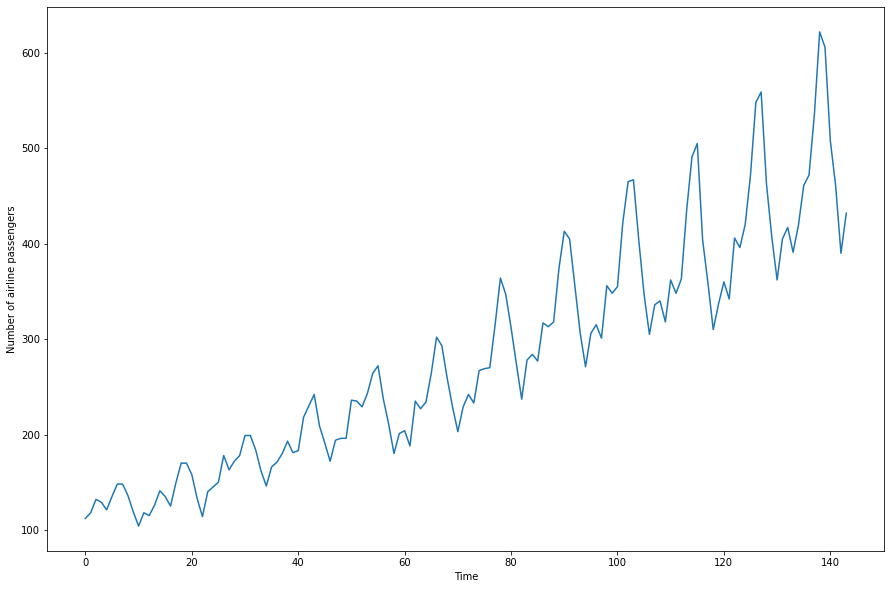

In [10]:
plt.figure(figsize = (15,10))
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Number of airline passengers')

[Text(0, 0.5, 'Number of airline passengers'), Text(0.5, 0, 'Time')]

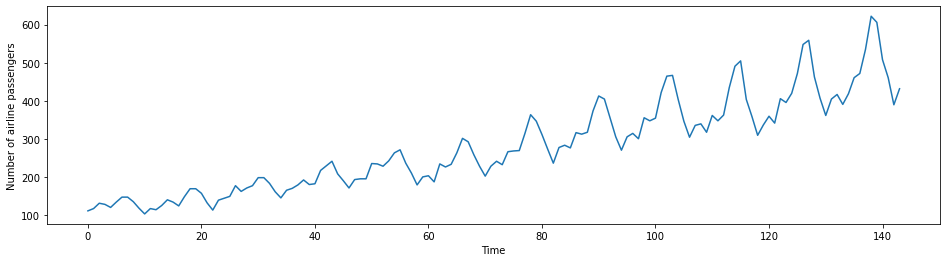

In [11]:
y = load_airline()
fig, ax = plot_ys(y)
ax.set(xlabel="Time", ylabel="Number of airline passengers")

### Forecasting task
* Each point in the data represents the number of passengers in a month.
* Now we will predict the number of passengers for coming 1 year, 2 years, 3 years

#### 1 year forecast

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x197db311518>)

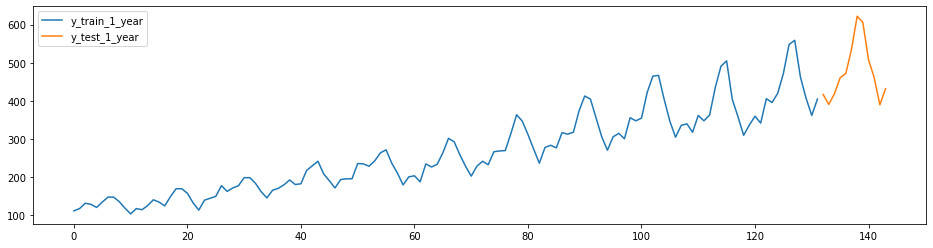

In [12]:
# 1 year forecast, since 1 year has 12 months, will forecast for next 12 points
y_train_1_year, y_test_1_year = temporal_train_test_split(y, test_size = 12)
plot_ys(y_train_1_year,
        y_test_1_year,
        labels = ['y_train_1_year', 'y_test_1_year'])


In [13]:
forecasting_horizon = np.arange(len(y_test_1_year)) + 1
forecasting_horizon

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Naive Bayes

test the results from Naive Bayes method

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x197dcb1cda0>)

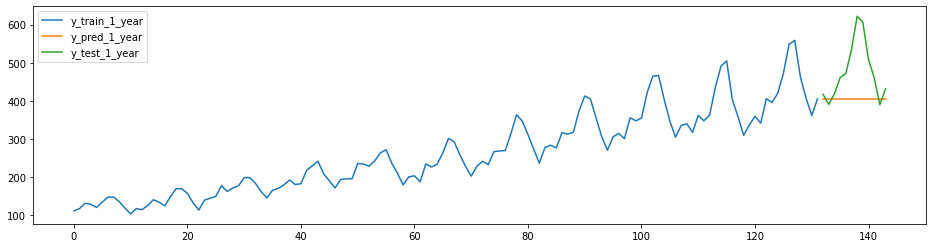

In [17]:
y_pred_1_year = np.repeat(a = y_train_1_year.iloc[-1], 
                          repeats = len(forecasting_horizon))
y_pred_1_year = pd.Series(data = y_pred_1_year,
                          index = y_train_1_year.index[-1] + forecasting_horizon)
plot_ys(y_train_1_year,
        y_pred_1_year,
        y_test_1_year,
        labels = ['y_train_1_year', 'y_pred_1_year', 'y_test_1_year'])

* sMAPE (symmetric mean absolute percentage error) to quantify the accuracy of our forecasts. A lower sMAPE means higher accuracy.
* __sp__ stands for seasonal periodicity, like the repeat of trend which is followed for a certain period of time

0.16120844670628973


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x197dd02b438>)

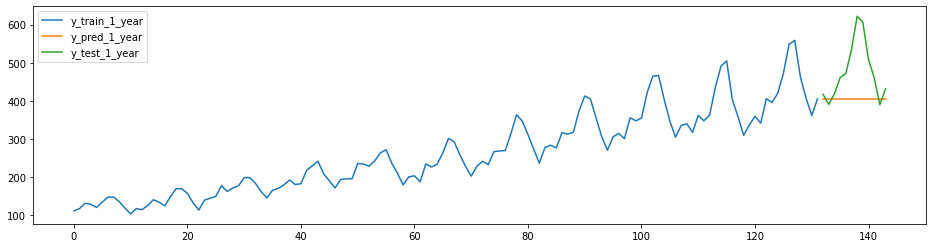

In [22]:
from sktime.forecasting.naive import NaiveForecaster

naive_model = NaiveForecaster(strategy = 'last')
naive_model.fit(y_train = y_train_1_year)
y_last_1_year = naive_model.predict(forecasting_horizon)
print(smape_loss(y_test = y_last_1_year,
           y_pred = y_test_1_year))
plot_ys(y_train_1_year,
        y_pred_1_year,
        y_test_1_year,
        labels = ['y_train_1_year', 'y_pred_1_year', 'y_test_1_year'])

0.105718082574979


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x197de1f35c0>)

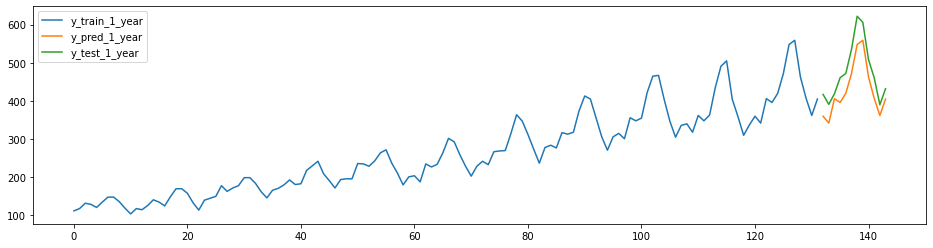

In [27]:
naive_model = NaiveForecaster(strategy = 'seasonal_last',sp = 12)

naive_model.fit(y_train = y_train_1_year)

y_pred_1_year = naive_model.predict(forecasting_horizon)

print(smape_loss(y_test = y_pred_1_year,
           y_pred = y_test_1_year))

plot_ys(y_train_1_year,
        y_pred_1_year,
        y_test_1_year,
        labels = ['y_train_1_year', 'y_pred_1_year', 'y_test_1_year'])

#### 2 year forecast

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x197de2e88d0>)

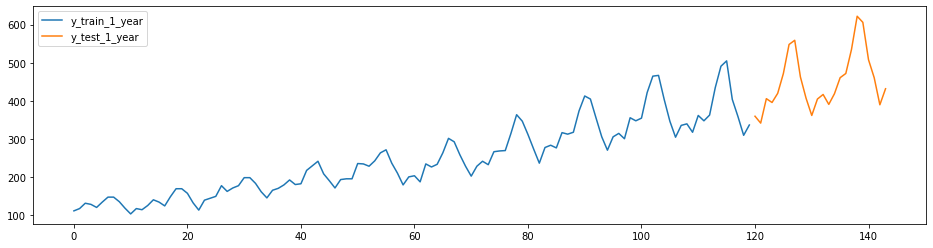

In [29]:
y_train_2_year, y_test_2_year = temporal_train_test_split(y, 
                                                          test_size = 24)

plot_ys(y_train_2_year,
        y_test_2_year,
        labels = ['y_train_1_year', 'y_test_1_year'])

0.17012625361650954


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x197de39cbe0>)

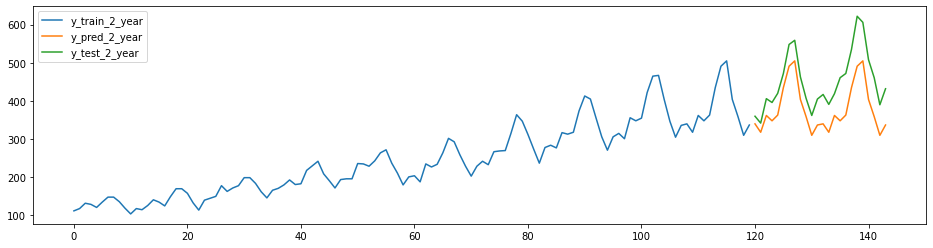

In [31]:
forecasting_horizon = np.arange(len(y_test_2_year)) + 1

naive_model.fit(y_train = y_train_2_year)

y_pred_2_year = naive_model.predict(forecasting_horizon)

print(smape_loss(y_test = y_pred_2_year,
           y_pred = y_test_2_year))

plot_ys(y_train_2_year,
        y_pred_2_year,
        y_test_2_year,
        labels = ['y_train_2_year', 'y_pred_2_year', 'y_test_2_year'])

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x197dcd58fd0>)

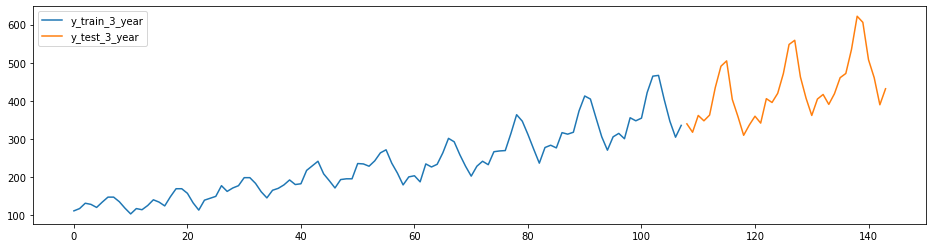

In [34]:
y_train_3_year, y_test_3_year = temporal_train_test_split(y, 
                                                          test_size = 36)

plot_ys(y_train_3_year,
        y_test_3_year,
        labels = ['y_train_3_year', 'y_test_3_year'])

0.145427686270316


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x197dc65a198>)

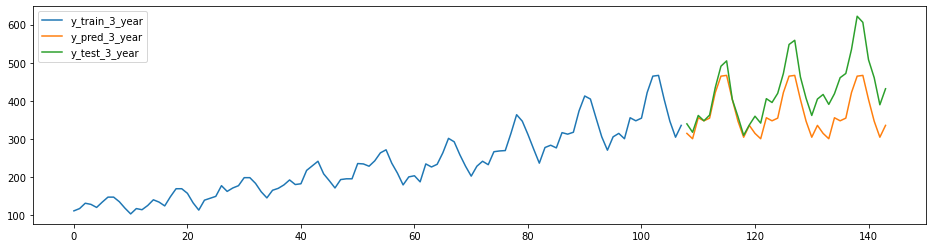

In [44]:
forecasting_horizon = np.arange(len(y_test_3_year)) + 1

naive_model = NaiveForecaster(strategy = 'seasonal_last',sp = 12)

naive_model.fit(y_train = y_train_3_year)

y_pred_3_year = naive_model.predict(forecasting_horizon)

print(smape_loss(y_test = y_test_3_year,
                 y_pred = y_pred_3_year))

plot_ys(y_train_3_year,
        y_pred_3_year,
        y_test_3_year,
        labels = ['y_train_3_year', 'y_pred_3_year', 'y_test_3_year'])

To better understand the prior data transformation, we can look at how we can split the training series into windows. Internally, sktime uses a temporal time series splitter, similar to the cross-validation splitter in scikit-learn. Here we show how this works for the first 20 observations of the training series:

In [45]:
from sktime.forecasting.model_selection import SlidingWindowSplitter

# cv = SlidingWindowSplitter()

In [49]:
cv = SlidingWindowSplitter(window_length = 12, 
                           start_with_window = True)

for input_window, output_window in cv.split(y_train_1_year):
    print(input_window, output_window)

[ 0  1  2  3  4  5  6  7  8  9 10 11] [12]
[ 1  2  3  4  5  6  7  8  9 10 11 12] [13]
[ 2  3  4  5  6  7  8  9 10 11 12 13] [14]
[ 3  4  5  6  7  8  9 10 11 12 13 14] [15]
[ 4  5  6  7  8  9 10 11 12 13 14 15] [16]
[ 5  6  7  8  9 10 11 12 13 14 15 16] [17]
[ 6  7  8  9 10 11 12 13 14 15 16 17] [18]
[ 7  8  9 10 11 12 13 14 15 16 17 18] [19]
[ 8  9 10 11 12 13 14 15 16 17 18 19] [20]
[ 9 10 11 12 13 14 15 16 17 18 19 20] [21]
[10 11 12 13 14 15 16 17 18 19 20 21] [22]
[11 12 13 14 15 16 17 18 19 20 21 22] [23]
[12 13 14 15 16 17 18 19 20 21 22 23] [24]
[13 14 15 16 17 18 19 20 21 22 23 24] [25]
[14 15 16 17 18 19 20 21 22 23 24 25] [26]
[15 16 17 18 19 20 21 22 23 24 25 26] [27]
[16 17 18 19 20 21 22 23 24 25 26 27] [28]
[17 18 19 20 21 22 23 24 25 26 27 28] [29]
[18 19 20 21 22 23 24 25 26 27 28 29] [30]
[19 20 21 22 23 24 25 26 27 28 29 30] [31]
[20 21 22 23 24 25 26 27 28 29 30 31] [32]
[21 22 23 24 25 26 27 28 29 30 31 32] [33]
[22 23 24 25 26 27 28 29 30 31 32 33] [34]
[23 24 25 2

### Exponential smoothening

In [50]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\sktime\forecasting\exp_smoothing.py:99: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  seasonal_periods=self.sp,
C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning
C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1136: FutureWarning: use_basinhopping is deprecated. Set optimization method using 'method'. This option will be removed after 0.13 is released.
  FutureWarning,


0.05144578094969351


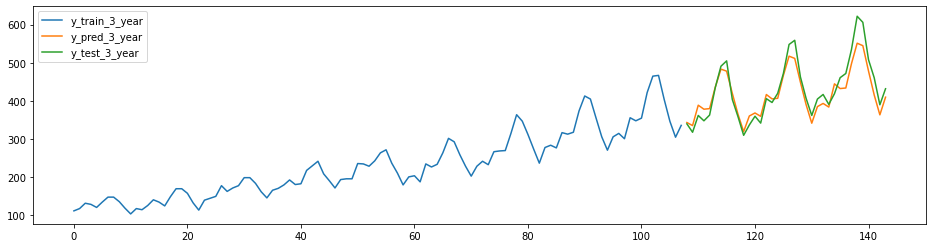

In [52]:
exp_smoothing_model = ExponentialSmoothing(sp = 12,
                                           trend = 'add',
                                           seasonal = 'multiplicative')

exp_smoothing_model.fit(y_train_3_year)

y_pred_3_year = exp_smoothing_model.predict(forecasting_horizon)

plot_ys(y_train_3_year,
        y_pred_3_year,
        y_test_3_year,
        labels = ['y_train_3_year', 'y_pred_3_year', 'y_test_3_year'])

print(smape_loss(y_test = y_test_3_year,
                 y_pred = y_pred_3_year))

### Ensembling

In [58]:
from sktime.forecasting.compose import EnsembleForecaster
forecaster = EnsembleForecaster([
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])

C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\sktime\forecasting\exp_smoothing.py:99: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  seasonal_periods=self.sp,
C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning
C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1136: FutureWarning: use_basinhopping is deprecated. Set optimization method using 'method'. This option will be removed after 0.13 is released.
  FutureWarning,


0.0792677475740509


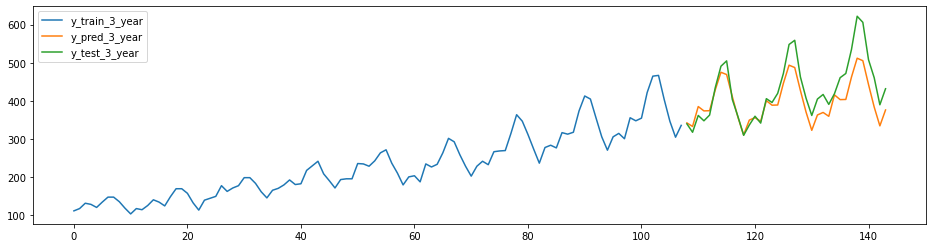

In [60]:
forecaster.fit(y_train_3_year)

y_pred_3_year = forecaster.predict(forecasting_horizon)

plot_ys(y_train_3_year,
        y_pred_3_year,
        y_test_3_year,
        labels = ['y_train_3_year', 'y_pred_3_year', 'y_test_3_year'])

print(smape_loss(y_test = y_test_3_year,
                 y_pred = y_pred_3_year))